In [1]:
import hyper_function as func

['GW191103_012549',
 'GW191105_143521',
 'GW191109_010717',
 'GW191113_071753',
 'GW191126_115259',
 'GW191127_050227',
 'GW191129_134029',
 'GW191204_110529',
 'GW191204_171526',
 'GW191204_171526_More_Point',
 'GW191204_171526_More_Point_stricter',
 'GW191215_223052',
 'GW191216_213338',
 'GW191222_033537',
 'GW191230_180458',
 'GW200112_155838',
 'GW200128_022011',
 'GW200129_065458',
 'GW200202_154313',
 'GW200208_130117',
 'GW200208_222617',
 'GW200209_085452',
 'GW200210_092255',
 'GW200216_220804',
 'GW200219_094415',
 'GW200220_061928',
 'GW200220_124850',
 'GW200224_222234',
 'GW200225_060421',
 'GW200302_015811',
 'GW200306_093714',
 'GW200308_173609',
 'GW200311_115853',
 'GW200316_215756',
 'GW200322_091133']

In [11]:
import os

import numpy as np


outdir = 'outdir'
label = 'hyper'



directory = '/home/zjcao/zhaozc/CPT_O3b/runs/'
events_name_list = sorted(os.listdir(directory))
print(len(events_name_list))
# events_name_list.remove('GW191204_171526_More_Point_stricter')
events_name_list.remove('GW191204_171526_More_Point')
events_name_list.remove('GW191204_171526')


result_file_list = [directory + name + '/run1/outdir/result/sola_0_result.json' for name in events_name_list]
flag = [os.path.exists(file) for file in result_file_list]

35


In [23]:
len(result_file_list[0:11]), len(result_file_list[11:22]), len(result_file_list[22:33])

(11, 11, 11)

In [3]:
import bilby

This message should only appear once


In [ ]:
result_file_list = result_file_list[0:2]

In [ ]:
result_file_list

In [4]:
import pandas as pd

In [5]:
results = [bilby.result.read_in_result(file) for file in result_file_list]

samples = [pd.DataFrame(result.posterior['zeta']) for result in results]
evidences = [result.log_evidence for result in results]


In [ ]:
for result,events_name in zip(results,events_name_list):
    result.plot_corner(outdir='zeta',parameters=['zeta'], filename=events_name)

In [ ]:
result.outdir

In [ ]:
for sample in samples:
    sample["log_prior"] = np.log(1 / 0.2)

In [ ]:
hp_likelihood = bilby.hyper.likelihood.HyperparameterLikelihood(
    posteriors=samples, hyper_prior=func.hyper_prior,
    log_evidences=evidences)


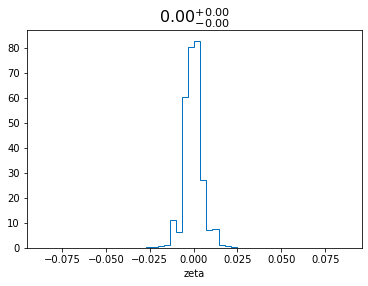

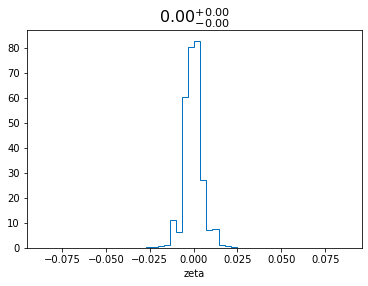

In [6]:
results[0].plot_corner(save=False,parameters=['zeta'])

In [25]:
import bilby

This message should only appear once


In [26]:
outdir = 'test_log'
label = 'hyper'

bilby.core.utils.setup_logger(outdir=outdir, label=label)

TypeError: can only concatenate str (not "list") to str

In [31]:
logging.info('data from' + str(events_name_list[0:2]))

In [ ]:
import os
import bilby 
import numpy as np
import hyper_function as func
import pandas as pd

import logging


outdir = 'test_logger'
label = 'hyper'

bilby.core.utils.setup_logger(outdir=outdir, label=label)

logging.basicConfig(filename=outdir+'/'+label+'.log', encoding='utf-8', level=logging.INFO)


directory = '/home/zjcao/zhaozc/CPT_O3b/runs/'
events_name_list = sorted(os.listdir(directory))
events_name_list.remove('GW191204_171526_More_Point')
events_name_list.remove('GW191204_171526')


result_file_list = [directory + name + '/run1/outdir/result/sola_0_result.json' for name in events_name_list]
flag = [os.path.exists(file) for file in result_file_list]


result_file_list  = result_file_list[0:2]


logging.info('data from' + str(events_name_list))

if False not in flag:
    results = [bilby.result.read_in_result(file) for file in result_file_list]

    samples = [pd.DataFrame(result.posterior['zeta']) for result in results]
    evidences = [result.log_evidence for result in results]
    for sample in samples:
        sample["log_prior"] = np.log(1 / 0.2)

    hp_likelihood = bilby.hyper.likelihood.HyperparameterLikelihood(
    posteriors=samples, hyper_prior=func.hyper_prior,
    log_evidences=evidences)


    hp_priors = dict(mu=bilby.core.prior.Uniform(-1.0, 1.0, 'mu', '$\mu$'),
                 sigma=bilby.core.prior.Uniform(0.0, 1.0, 'sigma', '$\sigma$'))

    # And run sampler

    if __name__ == '__main__':
        result = bilby.run_sampler(
            likelihood=hp_likelihood, priors=hp_priors, sampler='dynesty', nlive=1000,
            use_ratio=False, outdir=outdir, label=label,npool = 8,
            verbose=True, clean=True)
        
        
        
